# 한국거래소(KRX) 전체 종목 분석
* 분석 : pandas 라이브러리 사용
* 시각화 : seaborn 라이브러리 사용

## KRX_Collect 에서 수집한 데이터 불러오기
* csv 파일 불러오기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

In [2]:
# krx.csv 파일 불러오기
# Symbol colomn에 0 이 누락된 경우 데이터타입을 문자 형태로 변경
df=pd.read_csv("krx.csv", dtype={"Symbol":object})
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7208,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7209,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7210,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7211,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [3]:
# 행, 열
df.shape

(7213, 10)

## 일부 데이터 미리보기
* 상위
* 하위
* 아무거나

In [4]:
# 상위 3개만
df.head(3)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시


In [5]:
# 하위 5개만
df.tail()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
7208,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7209,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7210,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7211,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
7212,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [6]:
# 아무거나 두개
df.sample(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
6424,57GS58,KOSPI,한국GS58KOSPI200콜,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6029,57GM64,KOSPI,한국GM64POSCO콜,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 데이터 요약하기


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213 entries, 0 to 7212
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          7213 non-null   object
 1   Market          7213 non-null   object
 2   Name            7213 non-null   object
 3   Sector          2472 non-null   object
 4   Industry        2453 non-null   object
 5   ListingDate     2472 non-null   object
 6   SettleMonth     2472 non-null   object
 7   Representative  2472 non-null   object
 8   HomePage        2324 non-null   object
 9   Region          2472 non-null   object
dtypes: object(10)
memory usage: 563.6+ KB


* csv파일로 불러오면서 object 데이터 타입으로 바뀜

In [8]:
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,7213,7213,7213,2472,2453,2472,2472,2472,2324,2472
unique,7213,3,7213,160,2303,1827,9,2345,2302,22
top,57GS53,KOSPI,한국GV04LG화학콜,소프트웨어 개발 및 공급업,기업인수합병,1996-07-03,12월,-,http://www.ildong.com,서울특별시
freq,1,5540,1,145,27,8,2411,5,2,1001


In [9]:
df.nunique()

Symbol            7213
Market               3
Name              7213
Sector             160
Industry          2303
ListingDate       1827
SettleMonth          9
Representative    2345
HomePage          2302
Region              22
dtype: int64

In [10]:
# 함수가 아닌 attribute(index, columns)
df.index

RangeIndex(start=0, stop=7213, step=1)

In [11]:
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [12]:
df.values

array([['060310', 'KOSDAQ', '3S', ..., '박종익, 김세완 (각자 대표이사)',
        'http://www.3sref.com', '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '박대현',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['003280', 'KOSPI', '흥아해운', ..., '이환구', 'http://www.heung-a.com',
        '서울특별시'],
       ['037440', 'KOSDAQ', '희림', ..., '정영균, 이목운, 허철호 (각자대표)',
        'http://www.heerim.com', '서울특별시'],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

## 데이터 색인하기
### Series  :1차원 리스트

In [13]:
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [14]:
# Name 컬럼만 가져옴
df["Name"]

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
7208    흥국화재2우B
7209      흥국화재우
7210       흥아해운
7211         희림
7212         힘스
Name: Name, Length: 7213, dtype: object

In [15]:
# 타입 확인
type(df["Name"])

pandas.core.series.Series

In [16]:
# 1번 행 가져오기(인덱스)
df.loc[1]

Symbol                            095570
Market                             KOSPI
Name                              AJ네트웍스
Sector                   산업용 기계 및 장비 임대업
Industry             렌탈(파렛트, OA장비, 건설장비)
ListingDate                   2015-08-21
SettleMonth                          12월
Representative                       박대현
HomePage          http://www.ajnet.co.kr
Region                             서울특별시
Name: 1, dtype: object

In [17]:
type(df.loc[1])

pandas.core.series.Series

In [18]:
type(df)

pandas.core.frame.DataFrame

### DataFrame : row, column

In [19]:
# dataframe은 리스트 형태로 묶어줘야함
df[["Symbol", "Name"]]

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템
...,...,...
7208,000547,흥국화재2우B
7209,000545,흥국화재우
7210,003280,흥아해운
7211,037440,희림


In [20]:
df.loc[[1, 5]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시


In [21]:
# 하나의 컬럼을 dataframe 형태로 반환
df[["Name"]]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템
...,...
7208,흥국화재2우B
7209,흥국화재우
7210,흥아해운
7211,희림


In [22]:
# 행, 열
df.loc[1, "Name"]

'AJ네트웍스'

In [23]:
# 실행시 시간 비교
# dataframe에서 바로 가져옴
%timeit df.loc[2, "Name"]

15.1 µs ± 3.31 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
# 앞의 결과 dataframe에서 가져옴
%timeit df.loc[2]["Name"]

113 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
df.loc[[1, 5, 9], "Name"]

1                AJ네트웍스
5                  AP위성
9    ARIRANG 200선물인버스2X
Name: Name, dtype: object

In [26]:
df.loc[[1, 5, 9], ["Symbol", "Name"]]

,Symbol,Name
1,095570,AJ네트웍스
5,211270,AP위성
9,253160,ARIRANG 200선물인버스2X


### Boolean Indexing

In [27]:
# Name이 카카오인 행을 출력
df[df["Name"] == "카카오"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5197,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"여민수, 조수용",http://www.kakaocorp.com,제주특별자치도


* 서욽특별시 소재지이고 market이 KOSPI

In [28]:
# 두 줄의 결과를 모두 보고 싶을땐 display
display(df[df["Region"] == "서울특별시"])
df[df["Market"] == "KOSPI"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
48,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
7203,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
7206,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
7207,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
7210,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7203,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
7207,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
7208,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7209,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# and와 or은 &와 |로 표현(numpy벡터 연산)
(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI")

0       False
1        True
2        True
3       False
4       False
        ...  
7208    False
7209    False
7210     True
7211    False
7212    False
Length: 7213, dtype: bool

In [30]:
df[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI")]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
48,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
49,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
51,001460,KOSPI,BYC,봉제의복 제조업,"메리야스,란제리 제조,도매/건축공사/부동산 임대,분양,공급",1975-06-02,12월,김 대 환,http://home.byc.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
7195,079980,KOSPI,휴비스,화학섬유 제조업,"합성섬유(폴리에스테르원사,원면),재생섬유,폴리에스텔 원사,원면,고상칩 제조,도소매",2012-02-23,12월,신유동,http://www.huvis.com,서울특별시
7198,005010,KOSPI,휴스틸,1차 철강 제조업,"강관(배관용,구조용,유정용) 제조,도매",1973-06-29,12월,박훈,http://www.husteel.com,서울특별시
7203,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
7207,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시


In [31]:
# 해당 조건을 만족하는 특정 column만 출력
df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"), ["Symbol", "Name"]]

,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
48,027410,BGF
49,282330,BGF리테일
51,001460,BYC
...,...,...
7195,079980,휴비스
7198,005010,휴스틸
7203,069260,휴켐스
7207,000540,흥국화재


In [32]:
# 정리
seoul = df["Region"] == "서울특별시"
kospi = df["Market"] == "KOSPI"
df.loc[seoul&kospi, ["Symbol", "Name"]]

,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
48,027410,BGF
49,282330,BGF리테일
51,001460,BYC
...,...,...
7195,079980,휴비스
7198,005010,휴스틸
7203,069260,휴켐스
7207,000540,흥국화재


## 파생변수 만들기
### 데이터 타입 변경과 추출

In [33]:
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [34]:
# 데이터타입확인 : object
df["ListingDate"]

0       2002-04-23
1       2015-08-21
2       1999-08-11
3       2001-12-04
4       2017-04-07
           ...    
7208           NaN
7209           NaN
7210    1976-06-29
7211    2000-02-03
7212    2017-07-20
Name: ListingDate, Length: 7213, dtype: object

In [35]:
# datetime 형식으로 변환
# 원래 데이터 타입을 변경하는 형식으로 적용
df["ListingDate"] = pd.to_datetime(df["ListingDate"])
df["ListingDate"]

0      2002-04-23
1      2015-08-21
2      1999-08-11
3      2001-12-04
4      2017-04-07
          ...    
7208          NaT
7209          NaT
7210   1976-06-29
7211   2000-02-03
7212   2017-07-20
Name: ListingDate, Length: 7213, dtype: datetime64[ns]

In [36]:
# datetime 형식의 연도만 추출
df["ListingDate"].dt.year

0       2002.0
1       2015.0
2       1999.0
3       2001.0
4       2017.0
         ...  
7208       NaN
7209       NaN
7210    1976.0
7211    2000.0
7212    2017.0
Name: ListingDate, Length: 7213, dtype: float64

In [37]:
# datetime 형식의 달만 추출
df["ListingDate"].dt.month

0        4.0
1        8.0
2        8.0
3       12.0
4        4.0
        ... 
7208     NaN
7209     NaN
7210     6.0
7211     2.0
7212     7.0
Name: ListingDate, Length: 7213, dtype: float64

In [38]:
# datetime 형식의 날짜만 추출
df["ListingDate"].dt.day

0       23.0
1       21.0
2       11.0
3        4.0
4        7.0
        ... 
7208     NaN
7209     NaN
7210    29.0
7211     3.0
7212    20.0
Name: ListingDate, Length: 7213, dtype: float64

In [39]:
# datetime 형식의 요일만 추출
df["ListingDate"].dt.dayofweek

0       1.0
1       4.0
2       2.0
3       1.0
4       4.0
       ... 
7208    NaN
7209    NaN
7210    1.0
7211    3.0
7212    3.0
Name: ListingDate, Length: 7213, dtype: float64

### 파생 변수 생성

In [40]:
# ListingYear 파생변수
df["ListingYear"]=df["ListingDate"].dt.year
df["ListingYear"]

0       2002.0
1       2015.0
2       1999.0
3       2001.0
4       2017.0
         ...  
7208       NaN
7209       NaN
7210    1976.0
7211    2000.0
7212    2017.0
Name: ListingYear, Length: 7213, dtype: float64

In [41]:
df["ListingYear"].tail(5)

7208       NaN
7209       NaN
7210    1976.0
7211    2000.0
7212    2017.0
Name: ListingYear, dtype: float64

In [42]:
# NaN은 not a number의 약자로 데이터 타입이 float이다
# np.nan은 nan이다.
# numpy는 파이썬 대표적인 계산 라이브러리. pandas 내부에서도 사용(C언어로 작성)
import numpy as np
type(np.nan)

float

In [43]:
# 데이터 타입 확인
df[["ListingDate", "ListingYear"]].dtypes

ListingDate    datetime64[ns]
ListingYear           float64
dtype: object

## 데이터시각화 툴
* matplotlib : 복잡하고 어려움
* seaborn : 통계적 연산 쉽게 가능
* pandas : 간단한 시각화 가능

### Matplotlib
* Figure : 그래프 전체 바탕
* Axes : 그래프
* title : 그래프 제목
* Legend : 범례
* Grid : 격차 표시
* Spines : 테두리 선
* X axis Label : X축 레이블
* X tick lable : X축 레이블 값
* Y axis Label : Y축 레이블
* Y tick lable : Y축 레이블 값

### Seaborn
* matplotlib기반
* https://seaborn.pydata.org/examples/index.html 에서 그래프 코드 찾기 가능

### Pandas
* matplotlib기반
* https://pandas.pydata.org/docs/user_guide/visualization.html 에서 그래프 코드 찾기 가능


## 데이터 시각화를 위한 폰트 설정
* 시스템 환경에 따라 사용가능한 폰트명이 다름
* "Windows" : "Malgun Gothic"
* "Darwin" : "AppleGothic"
* "Linux": runtime 재시작 후 폰트 설치해야함(Colab)

In [44]:
# 시스템 환경이 뭔지 확인
import platform
system_name = platform.system()
system_name

'Windows'

In [45]:
def get_font_family() : 
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows" :
        font_family = "Malgun Gothic"
    else : 
        # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [46]:
get_font_family()

'Malgun Gothic'

In [47]:
# 시스템 폰트를 불러와서 font_family에 할당
import matplotlib.pyplot as plt
font_family = get_font_family()

# 폰트 설정
plt.rc("font", family=font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프 스타일 ggplot으로 설정
plt.style.use("ggplot")

<AxesSubplot:title={'center':'한글 제목'}>

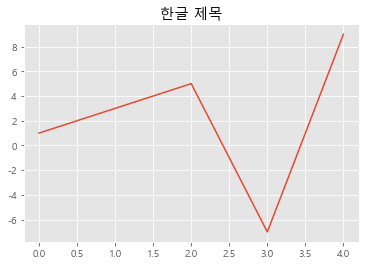

In [48]:
# 폰트 적용 확인(한글 제목과 마이너스 항목일때 기호)
pd.Series([1,3,5,-7,9]).plot(title="한글 제목")